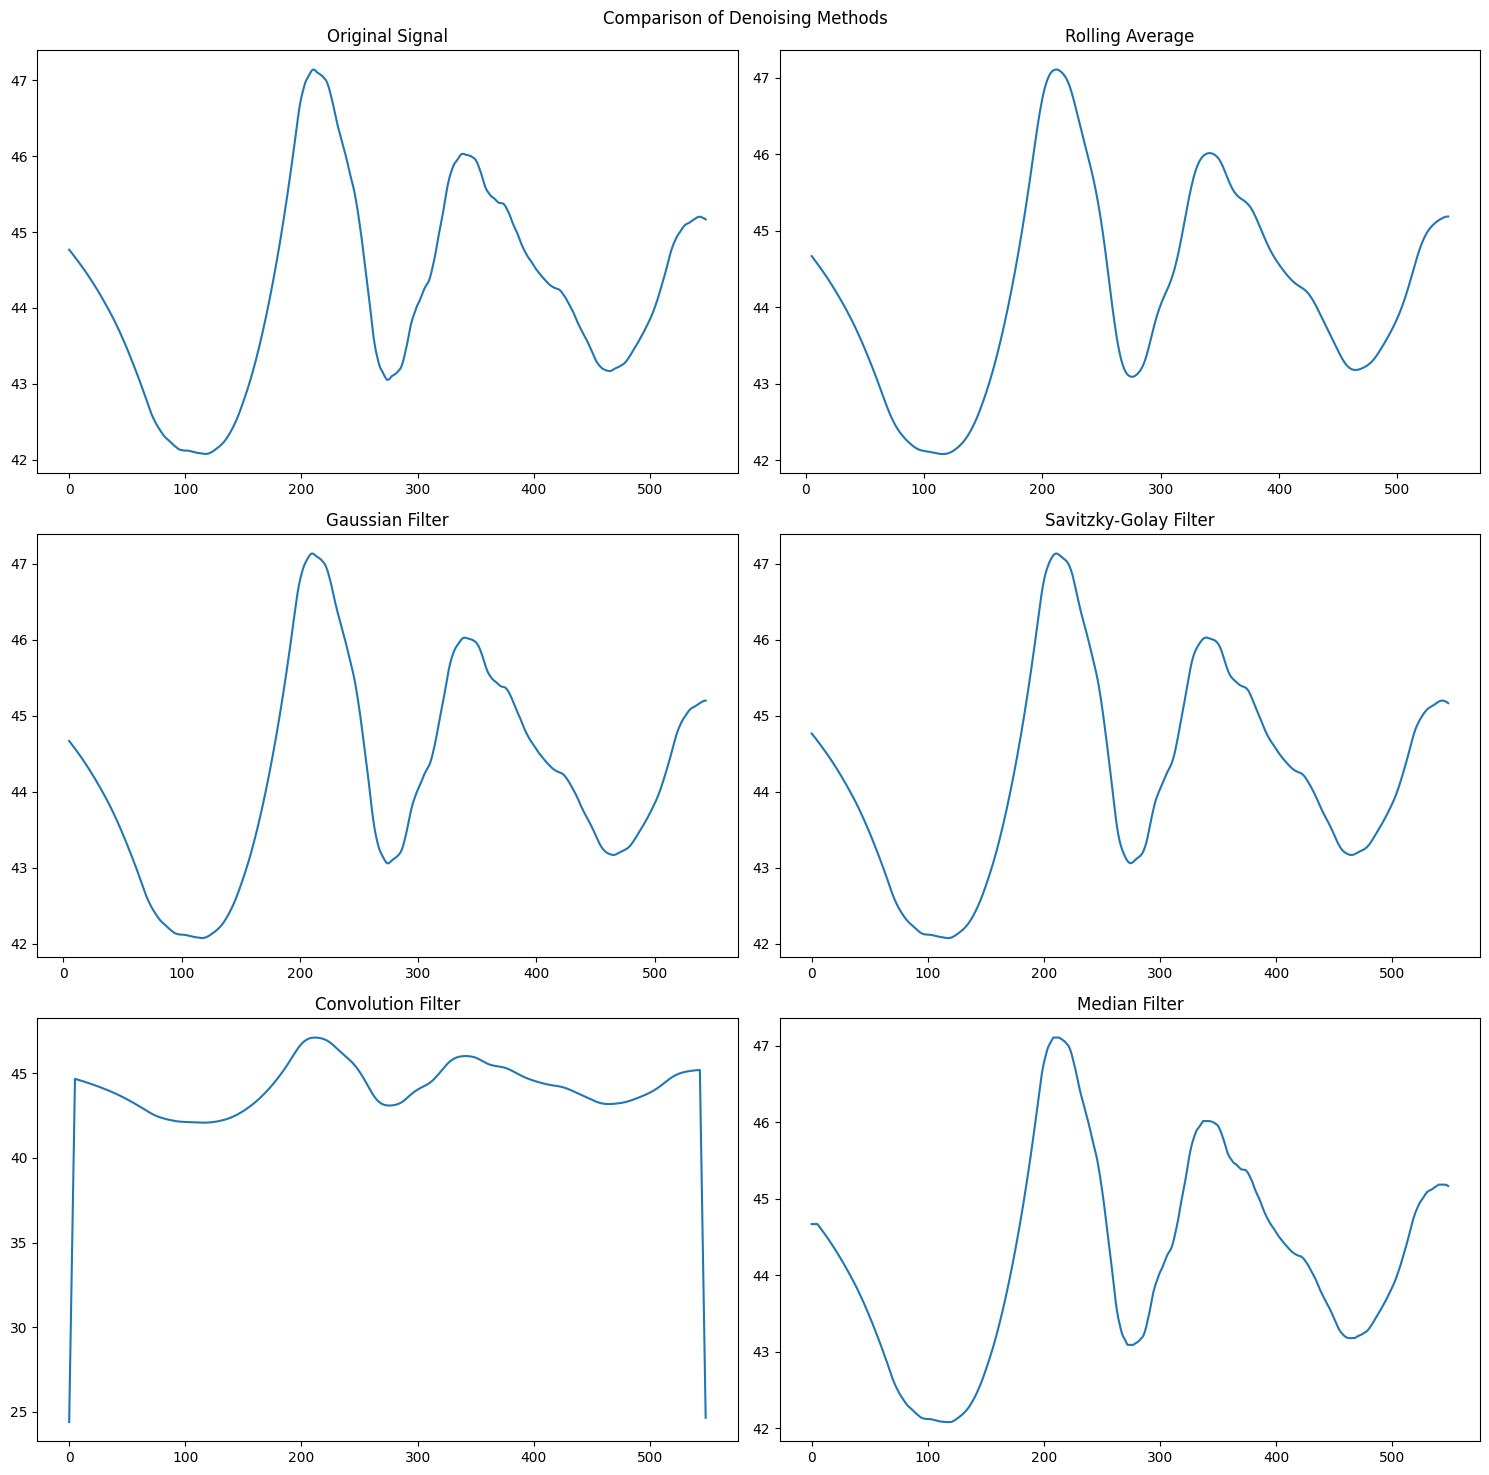

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

class TimeSeriesDenoiser:
    """
    A class implementing multiple denoising methods for time series data.
    """
    def __init__(self, data):
        self.data = np.array(data)
    
    def _ensure_odd_window(self, window_size):
        """Ensure window size is odd"""
        return window_size + 1 if window_size % 2 == 0 else window_size
    
    def rolling_average(self, window_size=11):
        """Apply rolling average denoising"""
        window_size = self._ensure_odd_window(window_size)
        return pd.Series(self.data).rolling(window=window_size, center=True).mean()
    
    def gaussian_filter(self, window_size=11):
        """Apply Gaussian-weighted rolling average"""
        window_size = self._ensure_odd_window(window_size)
        return pd.Series(self.data).rolling(
            window=window_size, 
            win_type='gaussian',
            center=True
        ).mean(std=1)
    
    def savitzky_golay(self, window_size=11, poly_order=3):
        """Apply Savitzky-Golay filter"""
        window_size = self._ensure_odd_window(window_size)
        if poly_order >= window_size:
            poly_order = window_size - 1
        return signal.savgol_filter(self.data, window_size, poly_order)
    
    def convolution_filter(self, window_size=11):
        """Apply convolution-based filtering"""
        window_size = self._ensure_odd_window(window_size)
        conv = np.repeat([0., 1., 0.], window_size)
        return signal.convolve(self.data, conv, mode='same') / window_size
    
    def median_filter(self, window_size=11):
        """Apply median filter"""
        window_size = self._ensure_odd_window(window_size)
        return signal.medfilt(self.data, window_size)
    
    def plot_comparison(self, window_size=11):
        """Plot comparison of different denoising methods"""
        window_size = self._ensure_odd_window(window_size)
        
        fig, axes = plt.subplots(3, 2, figsize=(15, 15))
        fig.suptitle('Comparison of Denoising Methods')
        
        # Original data
        axes[0, 0].plot(self.data)
        axes[0, 0].set_title('Original Signal')
        
        # Rolling average
        axes[0, 1].plot(self.rolling_average(window_size))
        axes[0, 1].set_title('Rolling Average')
        
        # Gaussian filter
        axes[1, 0].plot(self.gaussian_filter(window_size))
        axes[1, 0].set_title('Gaussian Filter')
        
        # Savitzky-Golay
        axes[1, 1].plot(self.savitzky_golay(window_size))
        axes[1, 1].set_title('Savitzky-Golay Filter')
        
        # Convolution
        axes[2, 0].plot(self.convolution_filter(window_size))
        axes[2, 0].set_title('Convolution Filter')
        
        # Median filter
        axes[2, 1].plot(self.median_filter(window_size))
        axes[2, 1].set_title('Median Filter')
        
        plt.tight_layout()
        plt.show()

def load_and_denoise(file_path, window_size=11):
    """
    Load data from file and apply denoising
    
    Parameters:
    file_path (str): Path to the data file
    window_size (int): Size of the window for denoising (will be converted to odd number)
    """
    try:
        # First try reading as CSV
        data = pd.read_csv(file_path, header=None).values.flatten()
    except:
        try:
            # Then try as plain text
            data = np.loadtxt(file_path)
        except:
            # Finally try reading as space-separated values
            try:
                with open(file_path, 'r') as f:
                    data = np.array([float(x) for x in f.read().split()])
            except:
                raise Exception("Unable to load data. Please check file format.")
    
    # Ensure window size is odd
    window_size = window_size + 1 if window_size % 2 == 0 else window_size
    
    # Initialize denoiser
    denoiser = TimeSeriesDenoiser(data)
    
    # Plot comparison of different methods
    denoiser.plot_comparison(window_size)
    
    # Return denoised data using different methods
    return {
        'rolling_avg': denoiser.rolling_average(window_size),
        'gaussian': denoiser.gaussian_filter(window_size),
        'savitzky_golay': denoiser.savitzky_golay(window_size),
        'convolution': denoiser.convolution_filter(window_size),
        'median': denoiser.median_filter(window_size)
    }

# Example usage:
if __name__ == "__main__":
    try:
        # Use with your file path
        file_path = "E:/chaospaper/fnn-master/tov.txt"
        results = load_and_denoise(file_path, window_size=11)
        
        # Save results
        for method, data in results.items():
            pd.Series(data).to_csv(f'denoised_{method}.csv', index=False)
            
    except Exception as e:
        print(f"Error: {str(e)}")

Saved original results to denoised_results\denoised_original.csv
Saved rolling_avg results to denoised_results\denoised_rolling_avg.csv
Saved gaussian results to denoised_results\denoised_gaussian.csv
Saved savitzky_golay results to denoised_results\denoised_savitzky_golay.csv
Saved convolution results to denoised_results\denoised_convolution.csv
Saved median results to denoised_results\denoised_median.csv


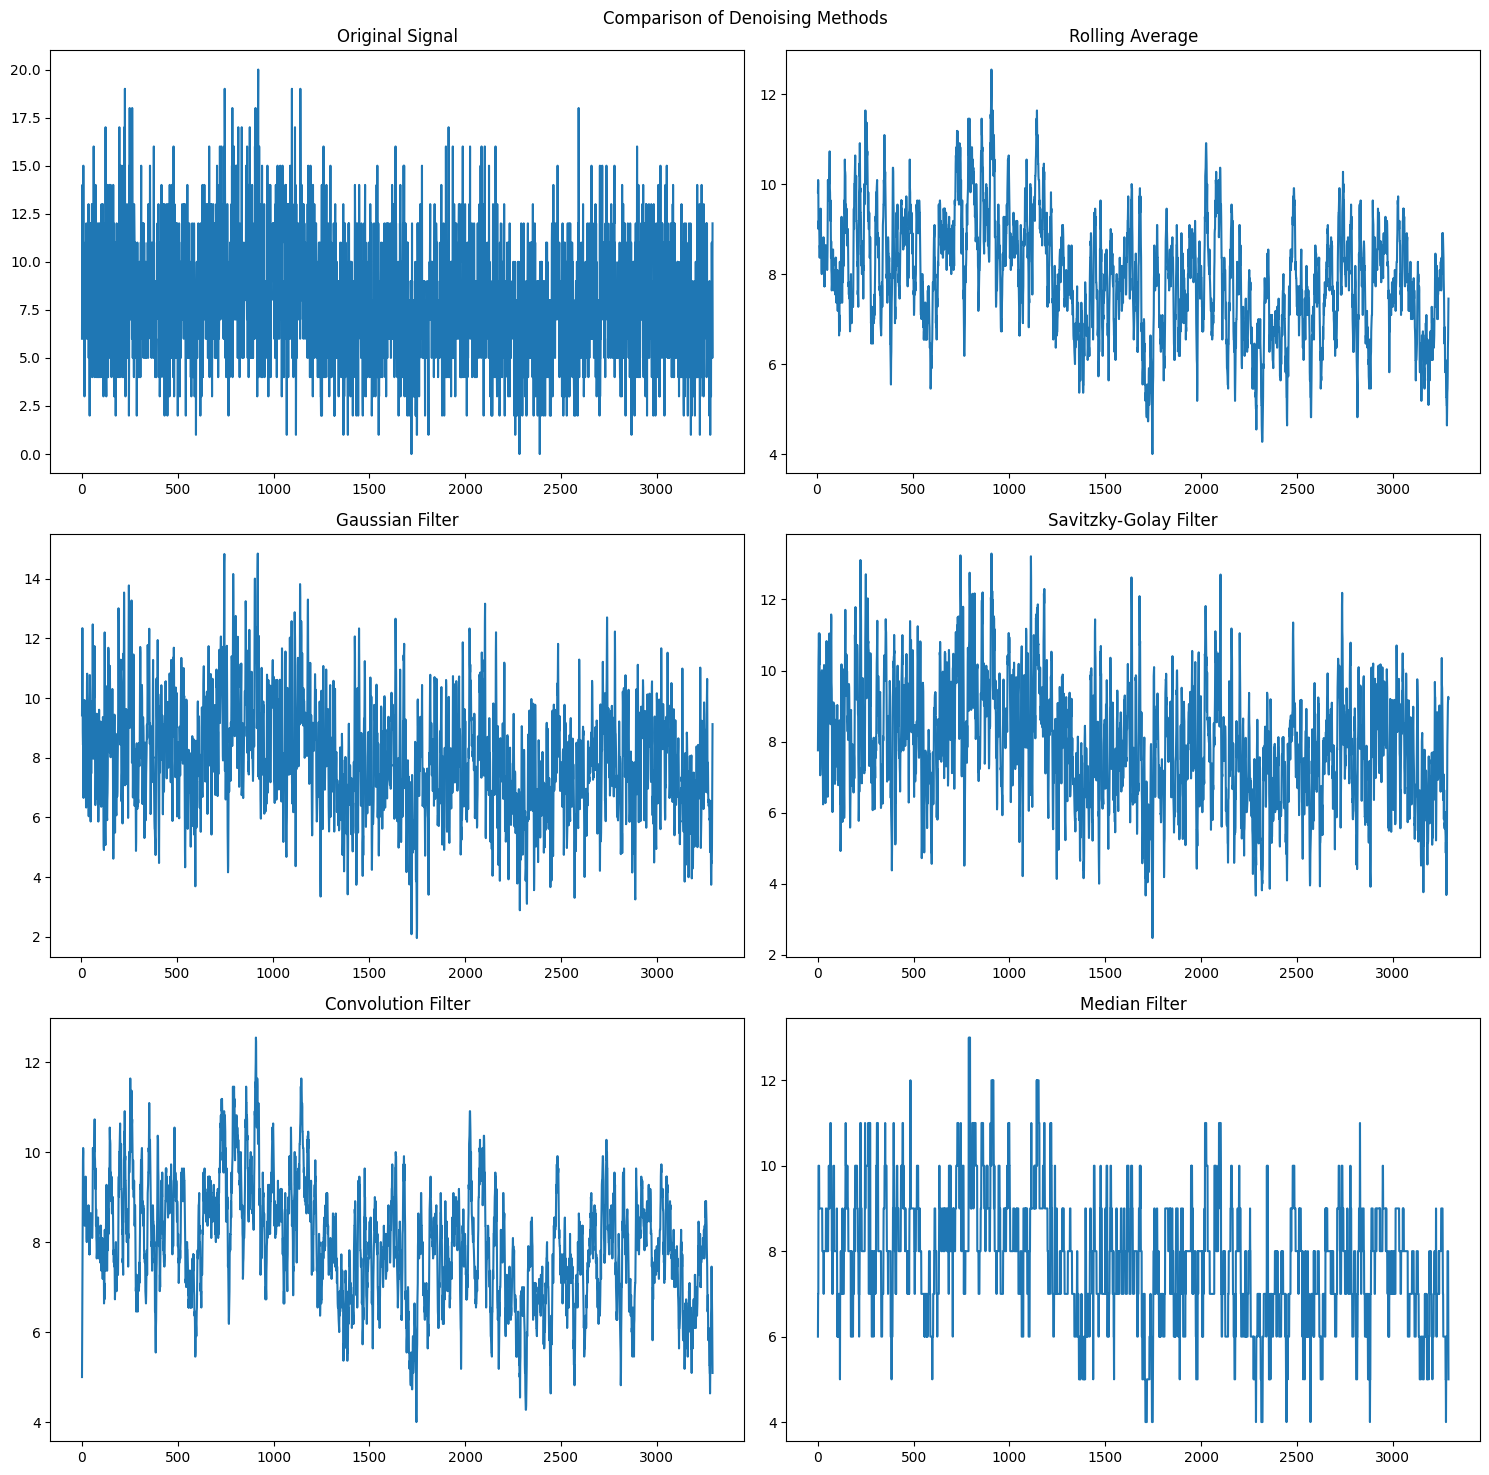

In [6]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import os

class TimeSeriesDenoiser:
    """
    A class implementing multiple denoising methods for time series data.
    """
    def __init__(self, data):
        self.data = np.array(data)
        self.original_index = np.arange(len(data))
    
    def _ensure_odd_window(self, window_size):
        """Ensure window size is odd"""
        return window_size + 1 if window_size % 2 == 0 else window_size
    
    def rolling_average(self, window_size=11):
        """Apply rolling average denoising"""
        window_size = self._ensure_odd_window(window_size)
        return pd.Series(self.data).rolling(window=window_size, center=True).mean()
    
    def gaussian_filter(self, window_size=11):
        """Apply Gaussian-weighted rolling average"""
        window_size = self._ensure_odd_window(window_size)
        return pd.Series(self.data).rolling(
            window=window_size, 
            win_type='gaussian',
            center=True
        ).mean(std=1)
    
    def savitzky_golay(self, window_size=11, poly_order=3):
        """Apply Savitzky-Golay filter"""
        window_size = self._ensure_odd_window(window_size)
        if poly_order >= window_size:
            poly_order = window_size - 1
        return signal.savgol_filter(self.data, window_size, poly_order)
    
    def convolution_filter(self, window_size=11):
        """Apply convolution-based filtering"""
        window_size = self._ensure_odd_window(window_size)
        conv = np.repeat([0., 1., 0.], window_size)
        return signal.convolve(self.data, conv, mode='same') / window_size
    
    def median_filter(self, window_size=11):
        """Apply median filter"""
        window_size = self._ensure_odd_window(window_size)
        return signal.medfilt(self.data, window_size)
    
    def plot_comparison(self, window_size=11):
        """Plot comparison of different denoising methods"""
        window_size = self._ensure_odd_window(window_size)
        
        fig, axes = plt.subplots(3, 2, figsize=(15, 15))
        fig.suptitle('Comparison of Denoising Methods')
        
        # Original data
        axes[0, 0].plot(self.data)
        axes[0, 0].set_title('Original Signal')
        
        # Rolling average
        axes[0, 1].plot(self.rolling_average(window_size))
        axes[0, 1].set_title('Rolling Average')
        
        # Gaussian filter
        axes[1, 0].plot(self.gaussian_filter(window_size))
        axes[1, 0].set_title('Gaussian Filter')
        
        # Savitzky-Golay
        axes[1, 1].plot(self.savitzky_golay(window_size))
        axes[1, 1].set_title('Savitzky-Golay Filter')
        
        # Convolution
        axes[2, 0].plot(self.convolution_filter(window_size))
        axes[2, 0].set_title('Convolution Filter')
        
        # Median filter
        axes[2, 1].plot(self.median_filter(window_size))
        axes[2, 1].set_title('Median Filter')
        
        plt.tight_layout()
        plt.show()

def load_and_denoise(file_path, output_dir='denoised_results', window_size=11):
    """
    Load data from file, apply denoising, and save results
    
    Parameters:
    file_path (str): Path to the data file
    output_dir (str): Directory to save results
    window_size (int): Size of the window for denoising
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    try:
        # First try reading as CSV
        data = pd.read_csv(file_path, header=None).values.flatten()
    except:
        try:
            # Then try as plain text
            data = np.loadtxt(file_path)
        except:
            try:
                # Finally try reading as space-separated values
                with open(file_path, 'r') as f:
                    data = np.array([float(x) for x in f.read().split()])
            except:
                raise Exception("Unable to load data. Please check file format.")
    
    # Initialize denoiser
    denoiser = TimeSeriesDenoiser(data)
    
    # Get results from all methods
    results = {
        'original': data,
        'rolling_avg': denoiser.rolling_average(window_size),
        'gaussian': denoiser.gaussian_filter(window_size),
        'savitzky_golay': denoiser.savitzky_golay(window_size),
        'convolution': denoiser.convolution_filter(window_size),
        'median': denoiser.median_filter(window_size)
    }
    
    # Save results with index
    for method, data in results.items():
        df = pd.DataFrame({
            'index': np.arange(len(data)),
            'value': data
        })
        output_path = os.path.join(output_dir, f'denoised_{method}.csv')
        df.to_csv(output_path, index=False)
        print(f"Saved {method} results to {output_path}")
    
    # Plot comparison
    denoiser.plot_comparison(window_size)
    
    return results

# Example usage:
if __name__ == "__main__":
    try:
        file_path = r"E:\chaospaper\fnn-master\tov.txt"  # Replace with your file path
        results = load_and_denoise(file_path, output_dir='denoised_results', window_size=11)
    except Exception as e:
        print(f"Error: {str(e)}")